# Map of Terrorism Attacks by City

In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\Amber Camilleri\.conda\envs\ipykernel_py2\Library\share'

# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
from pandas import Series, DataFrame
from mpl_toolkits.basemap import Basemap
import scipy

# By Each Year

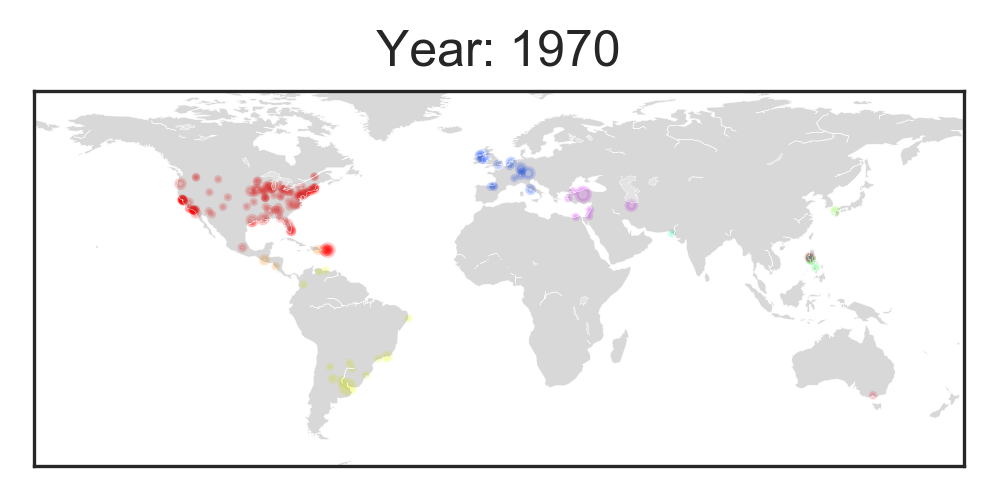

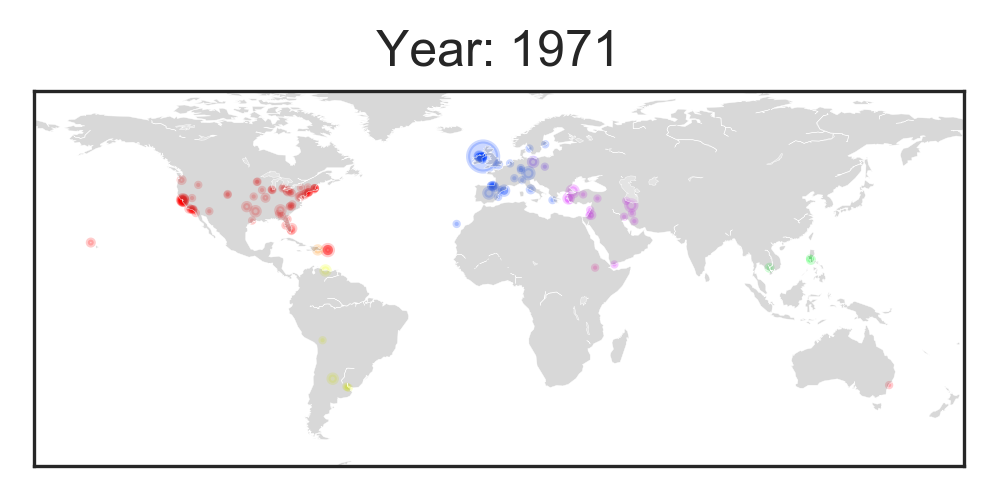

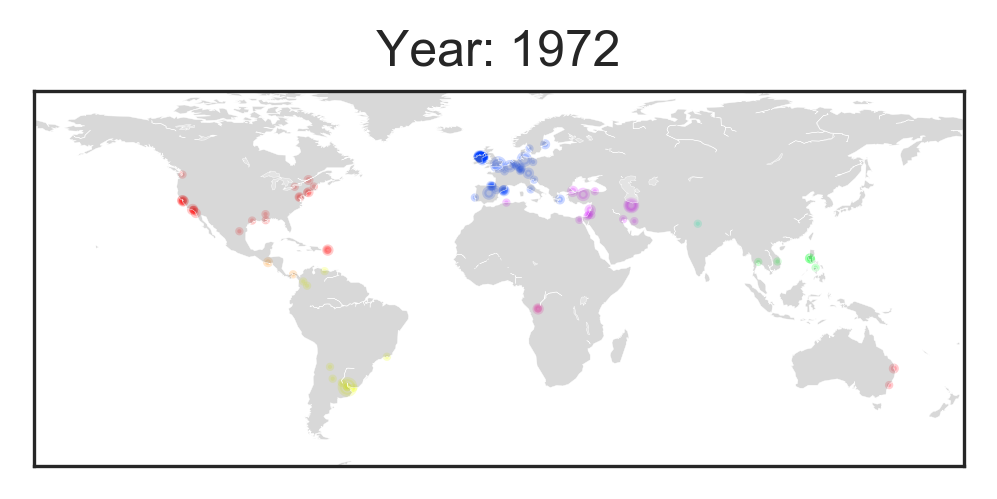

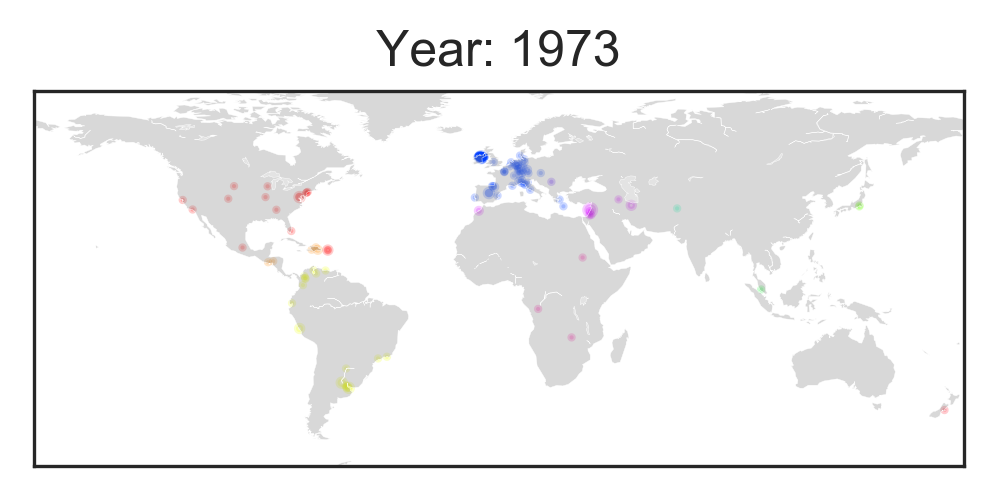

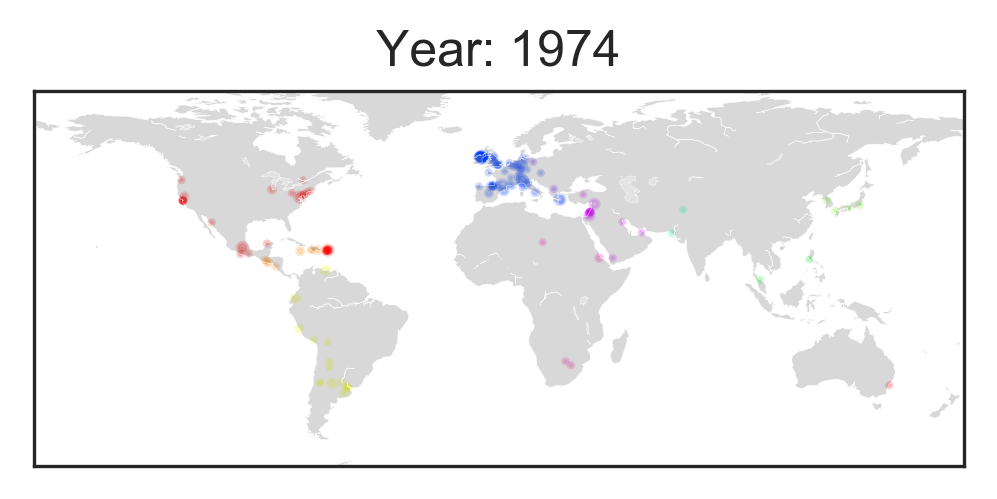

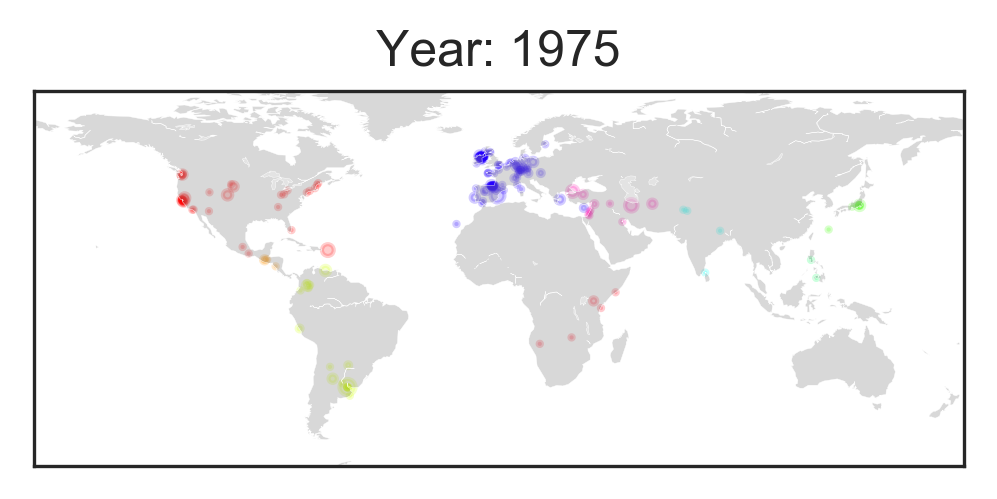

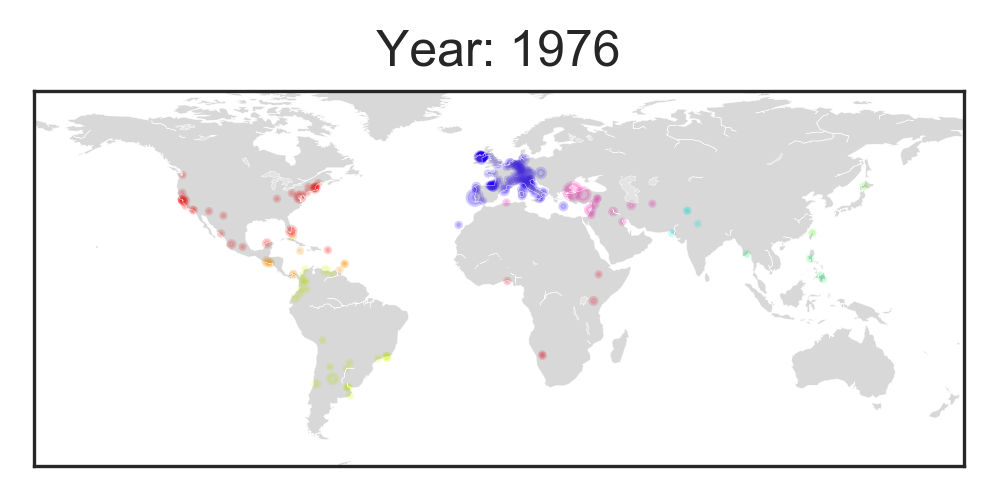

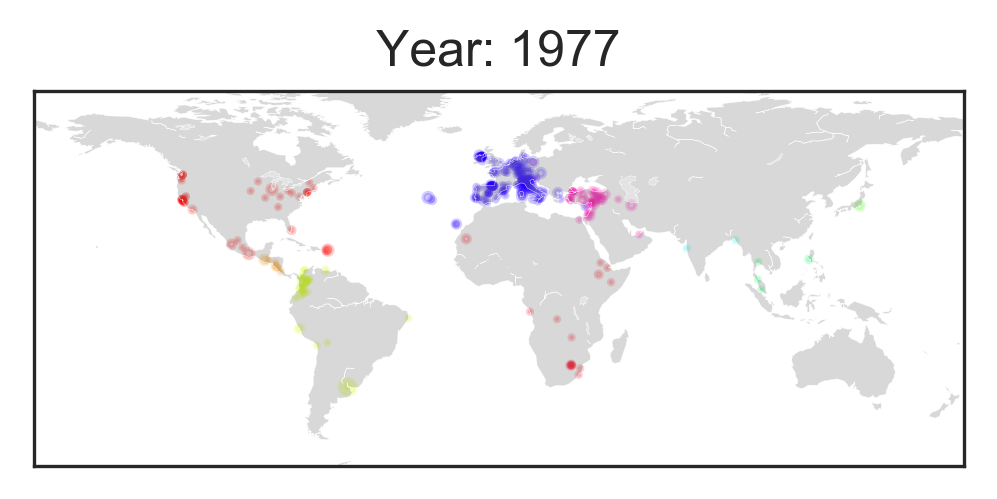

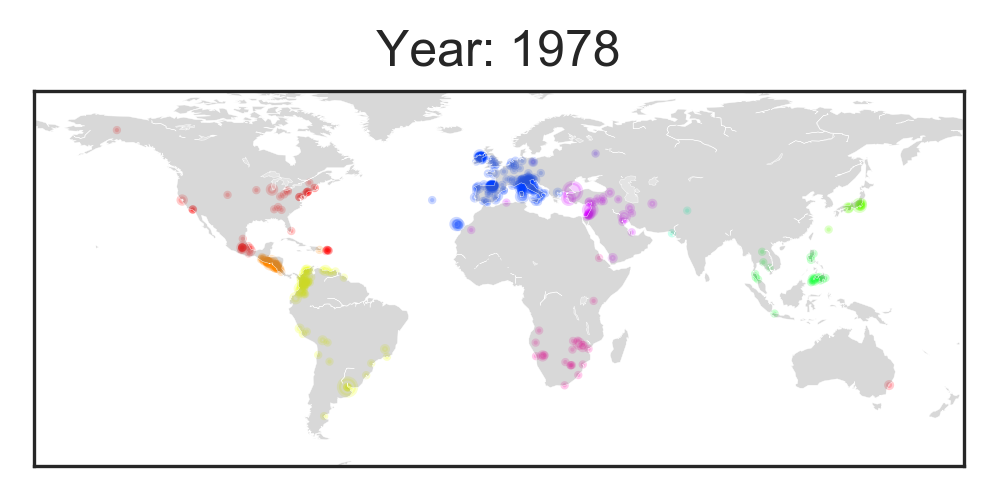

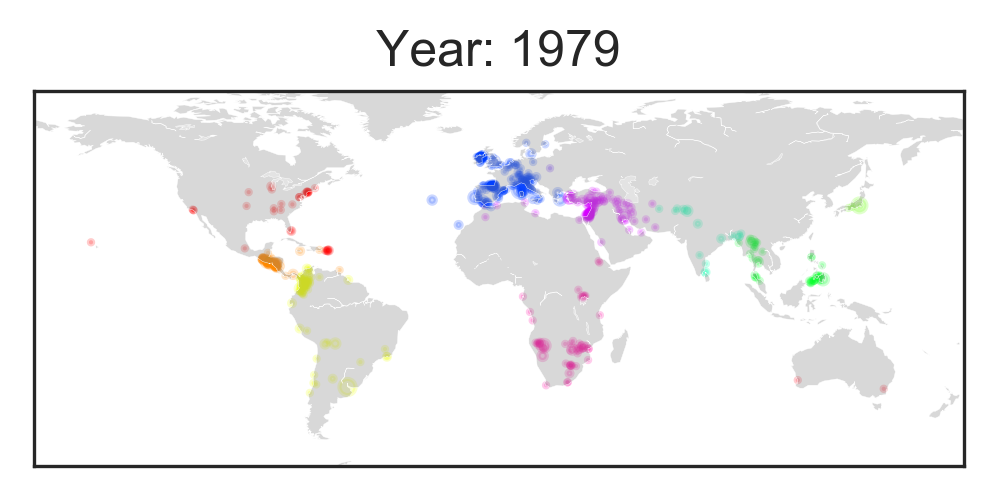

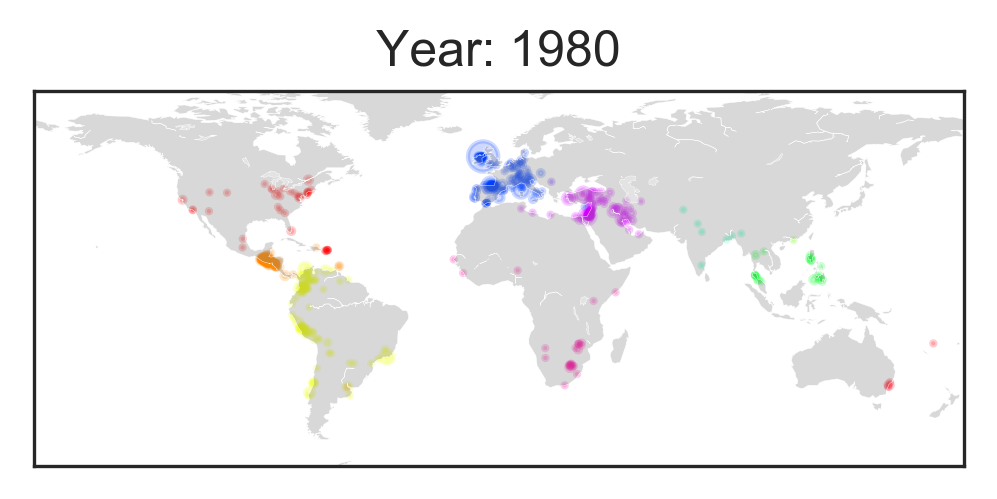

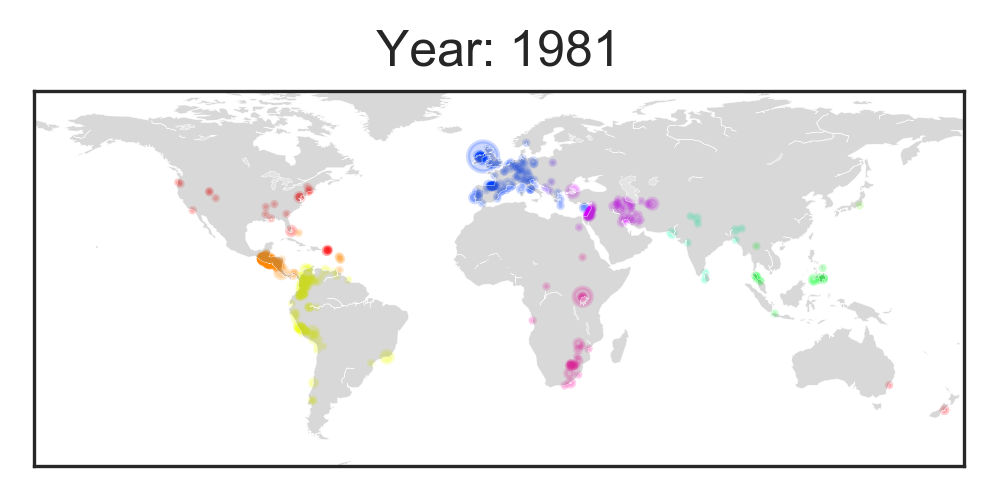

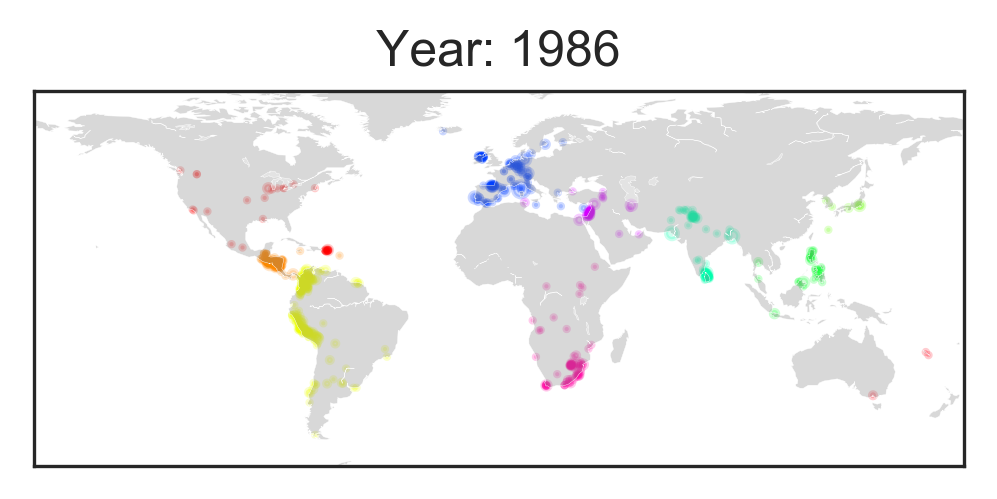

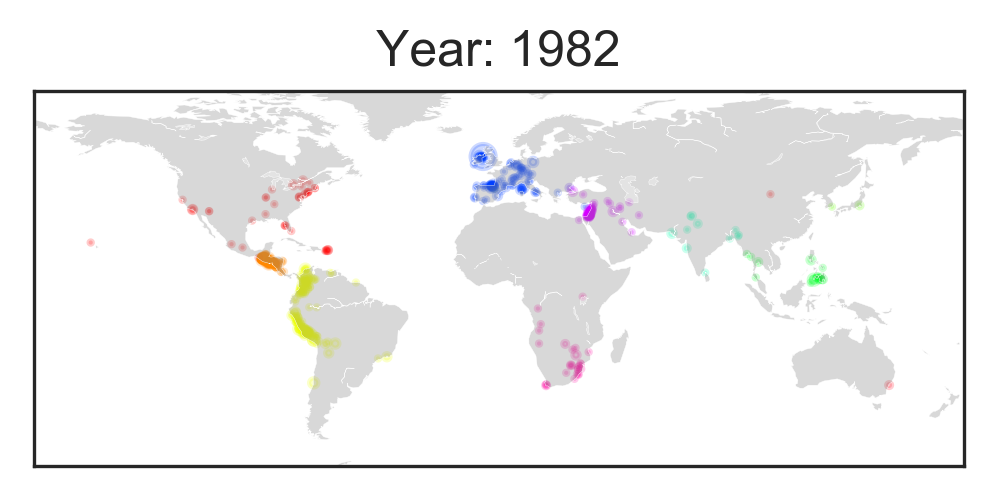

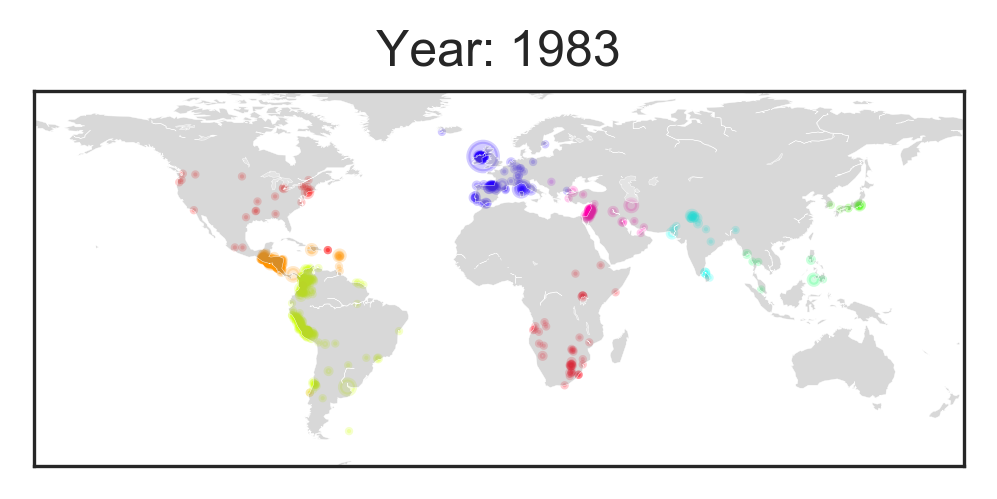

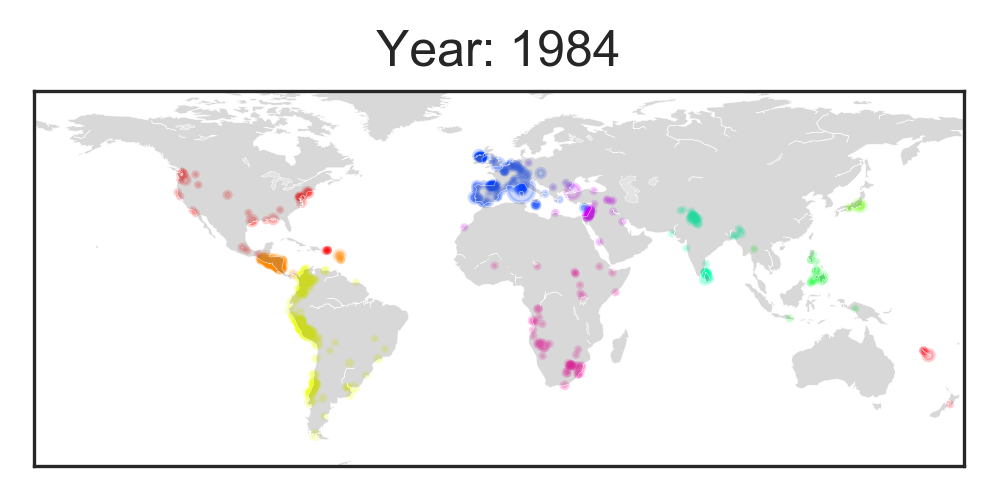

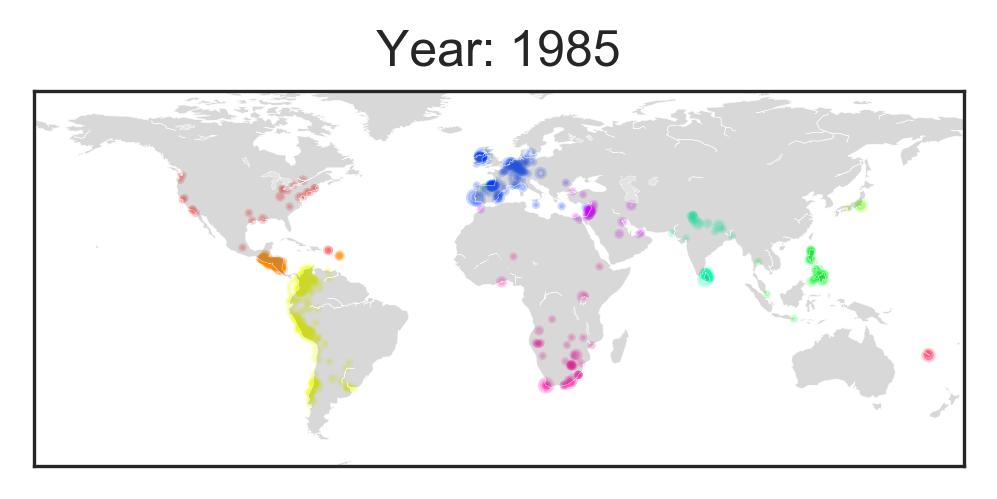

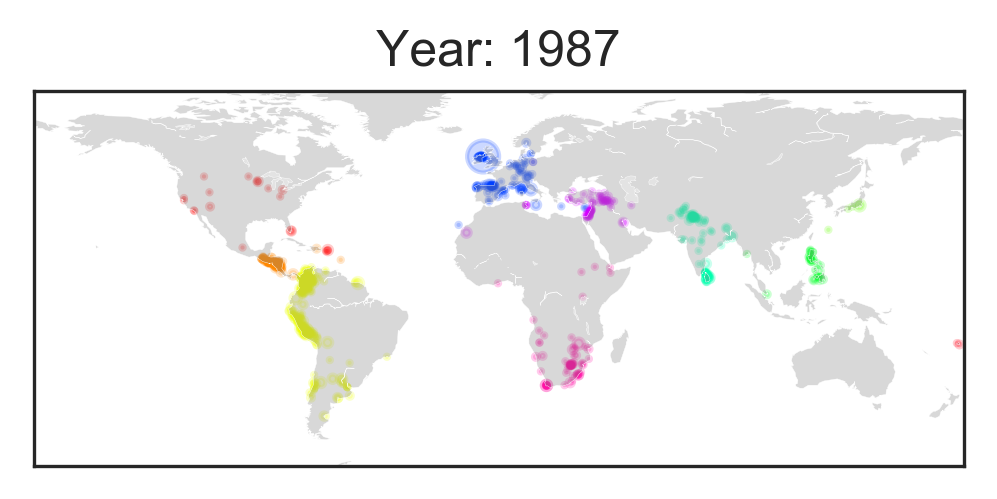

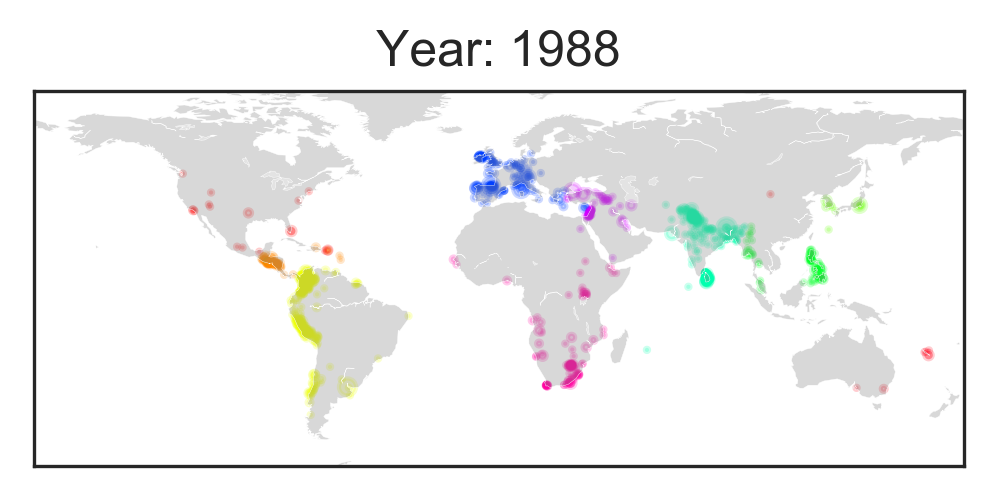

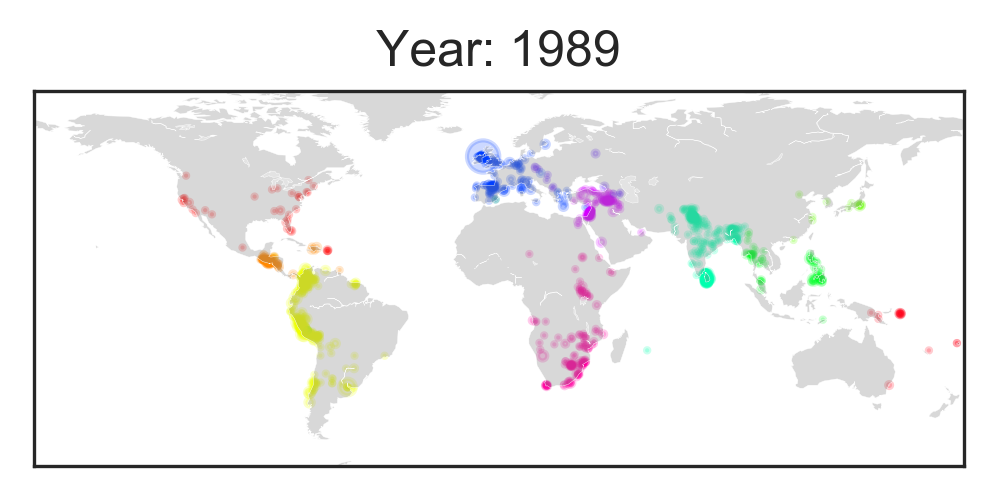

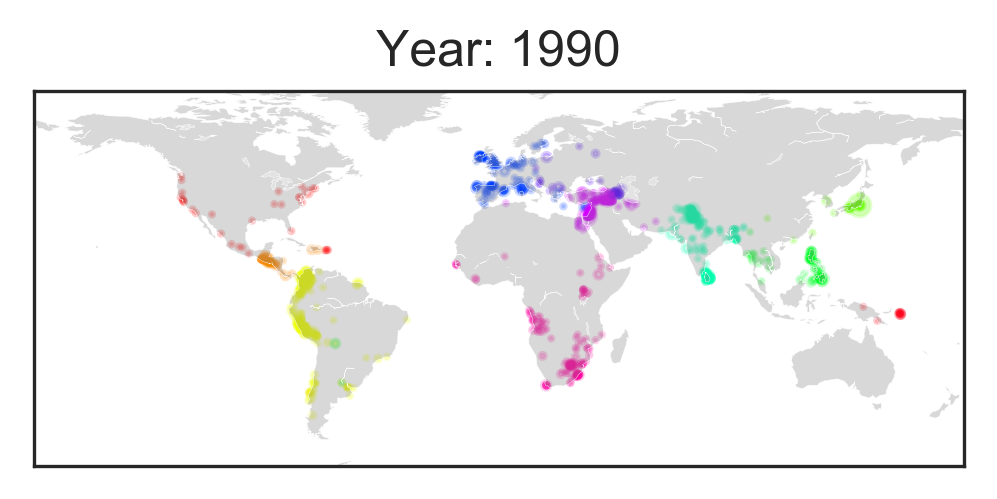

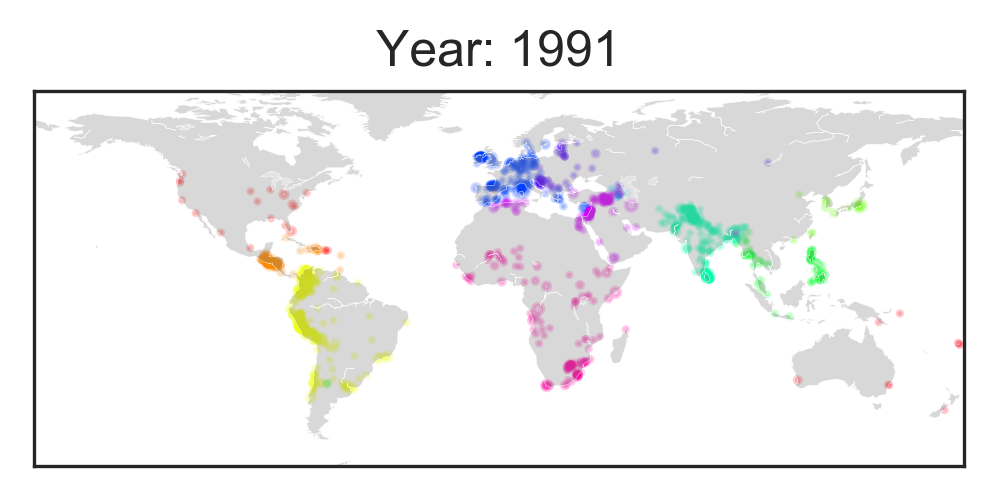

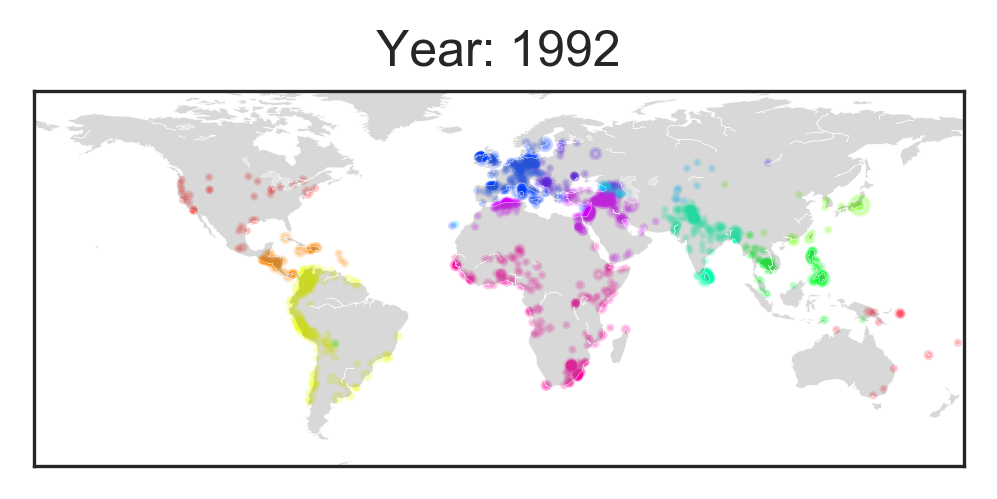

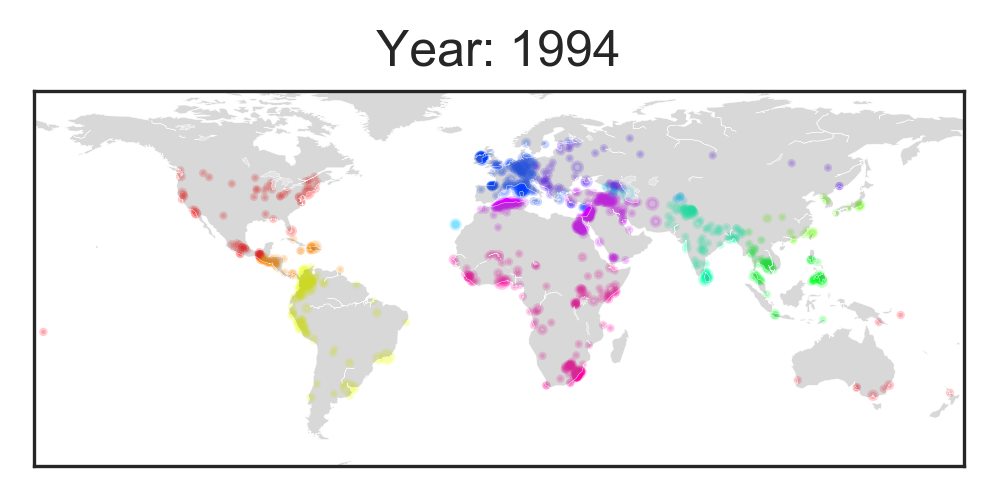

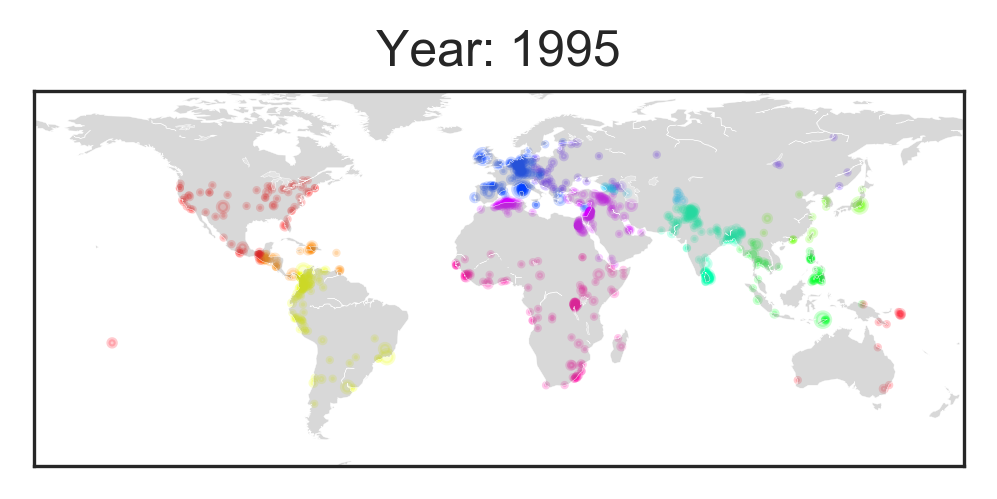

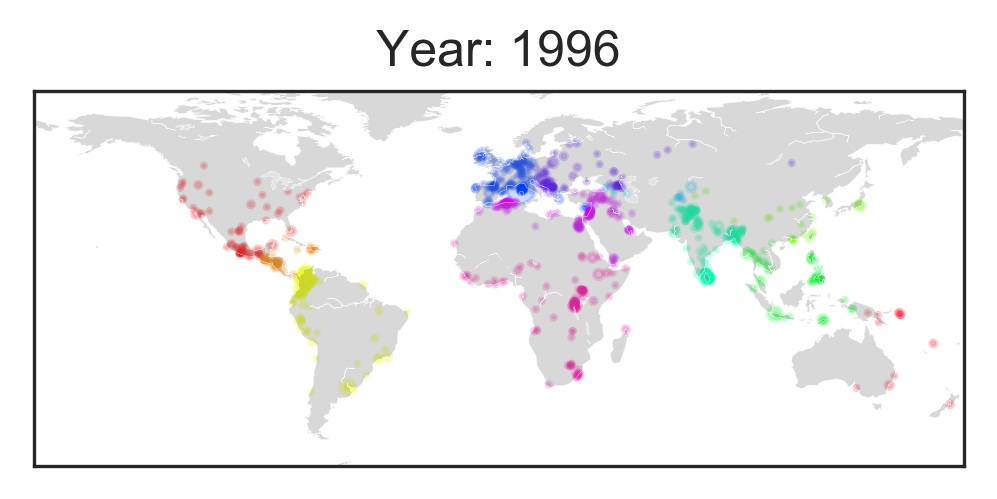

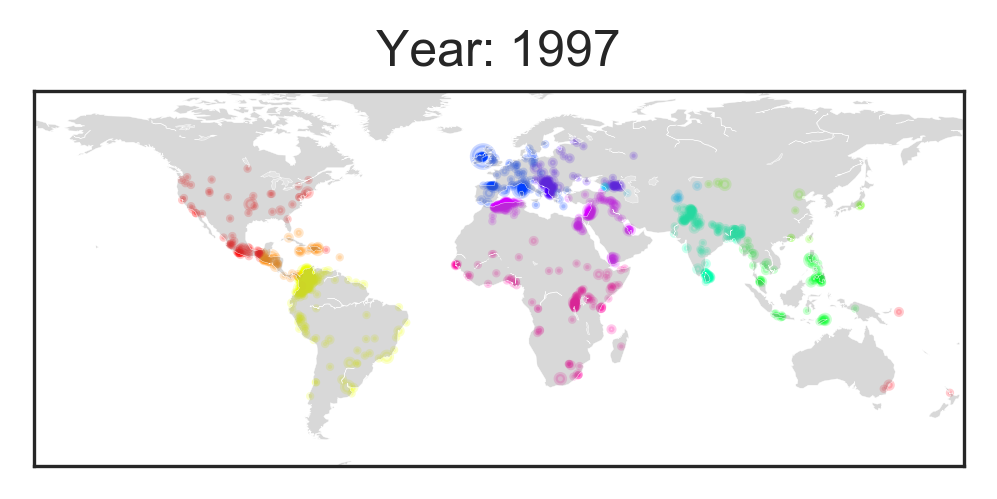

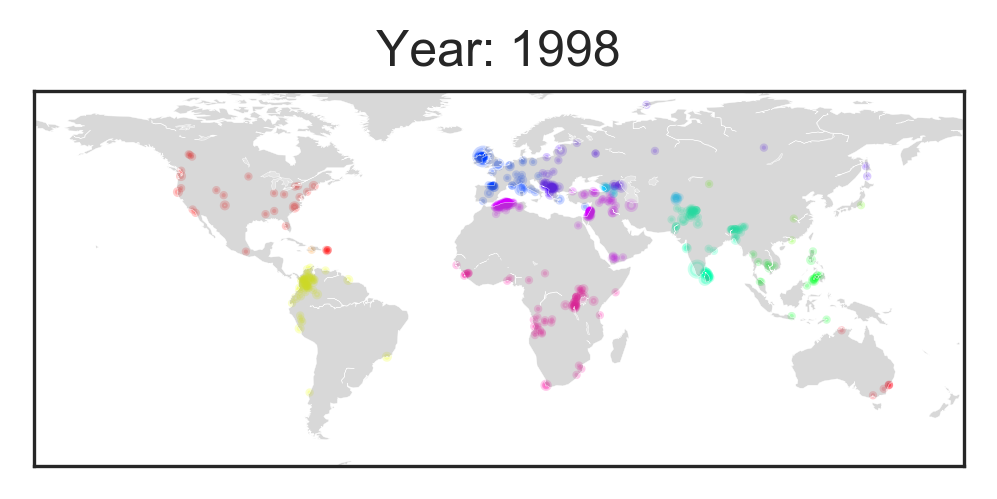

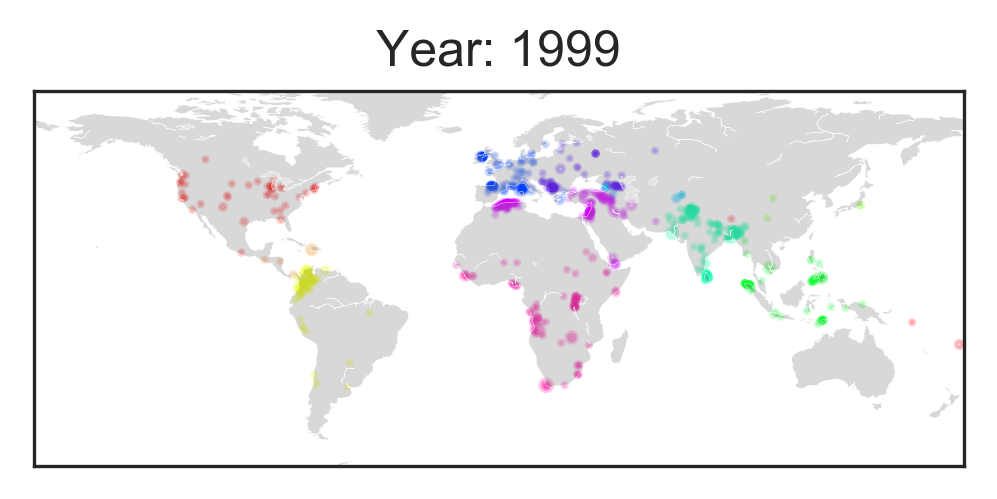

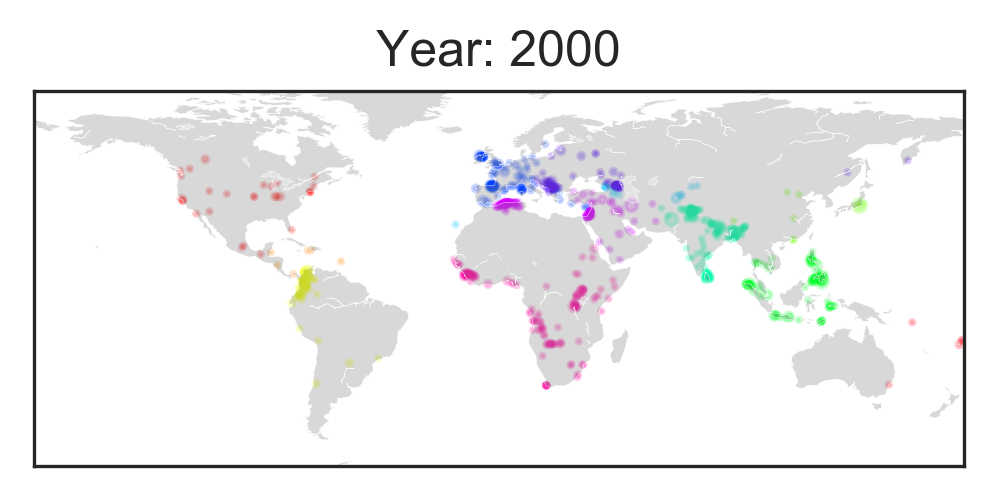

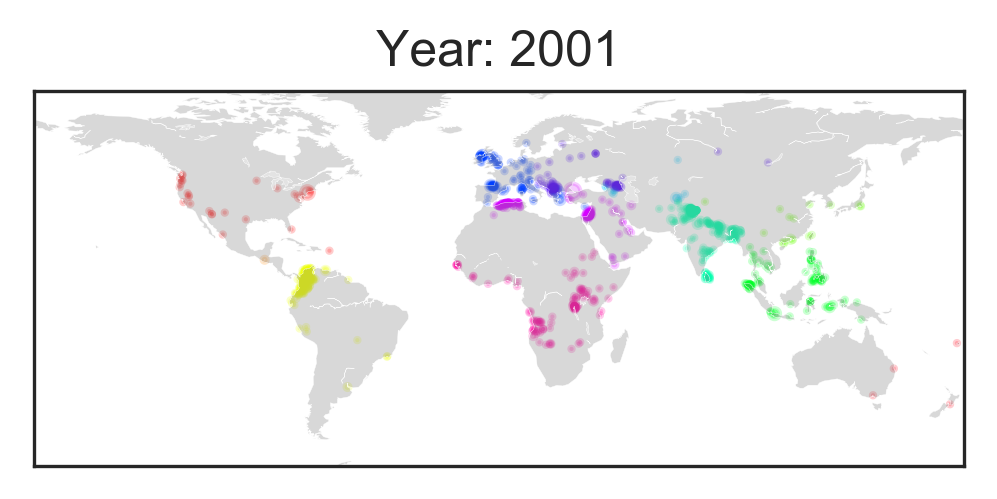

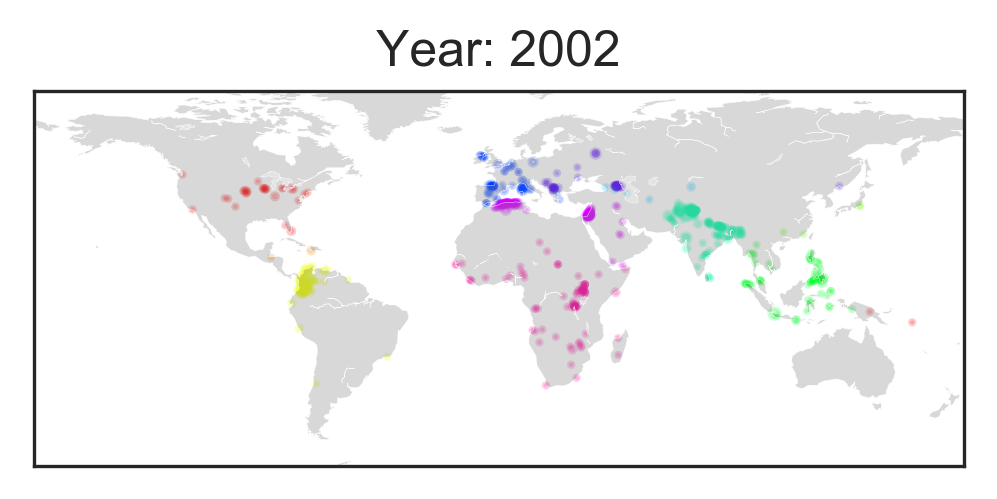

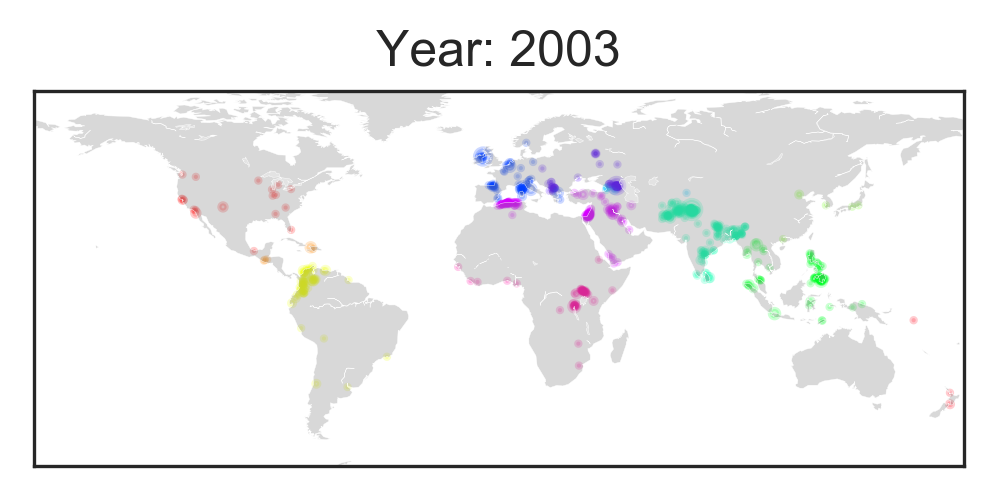

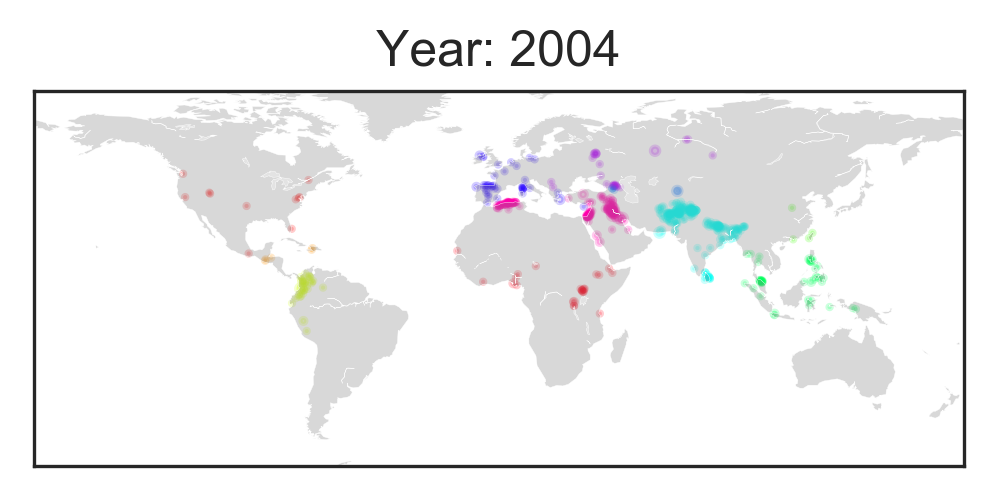

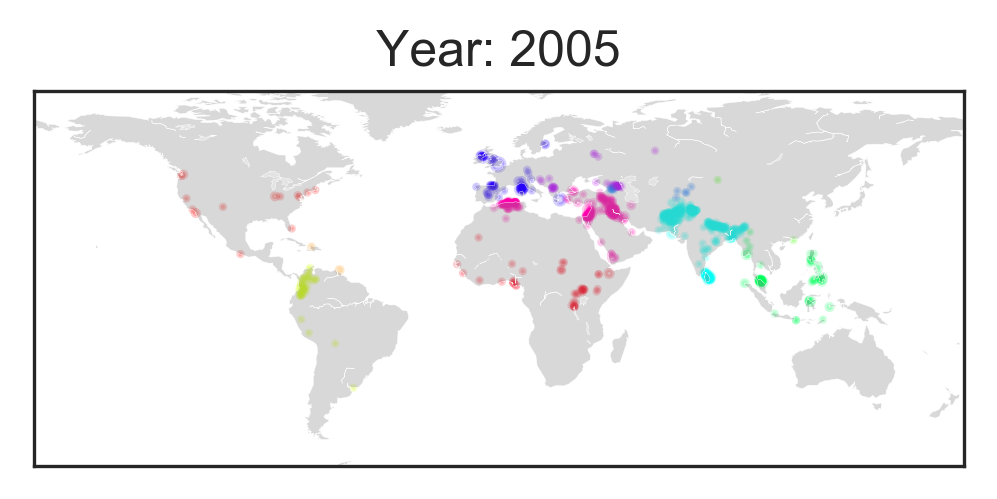

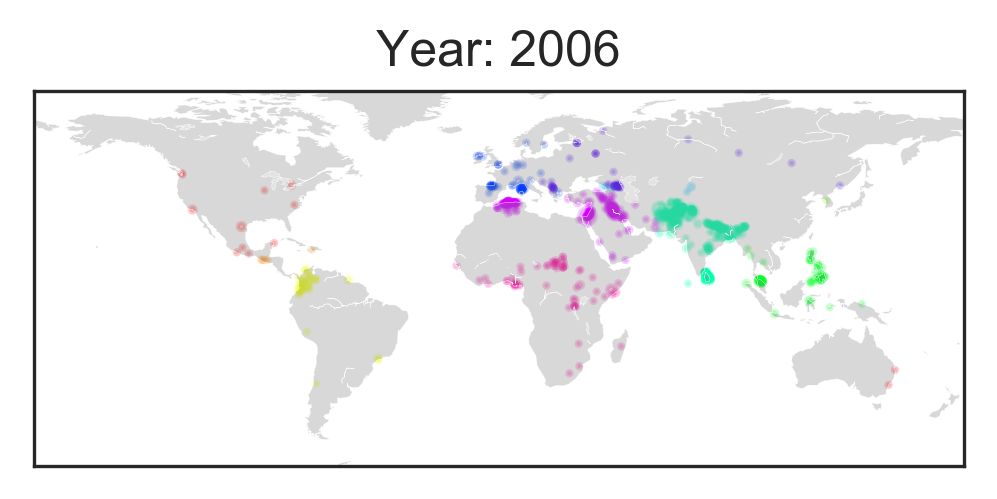

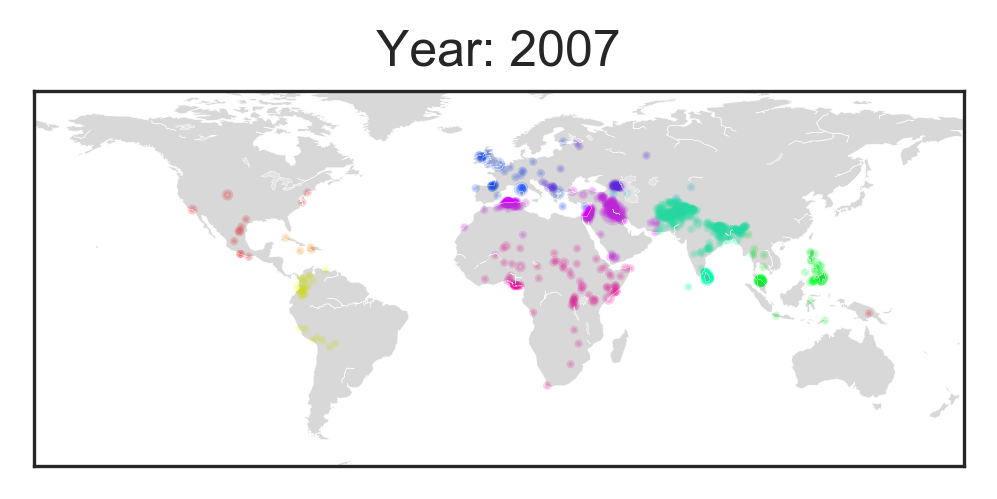

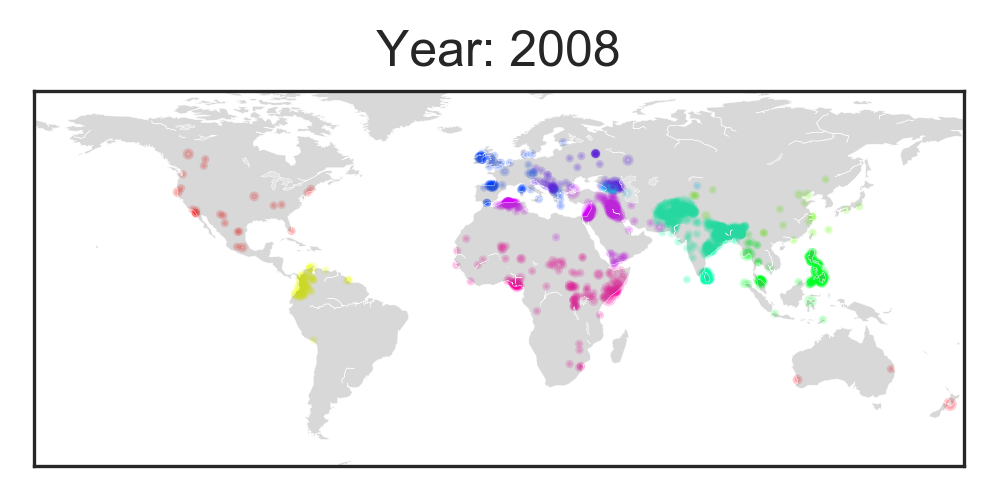

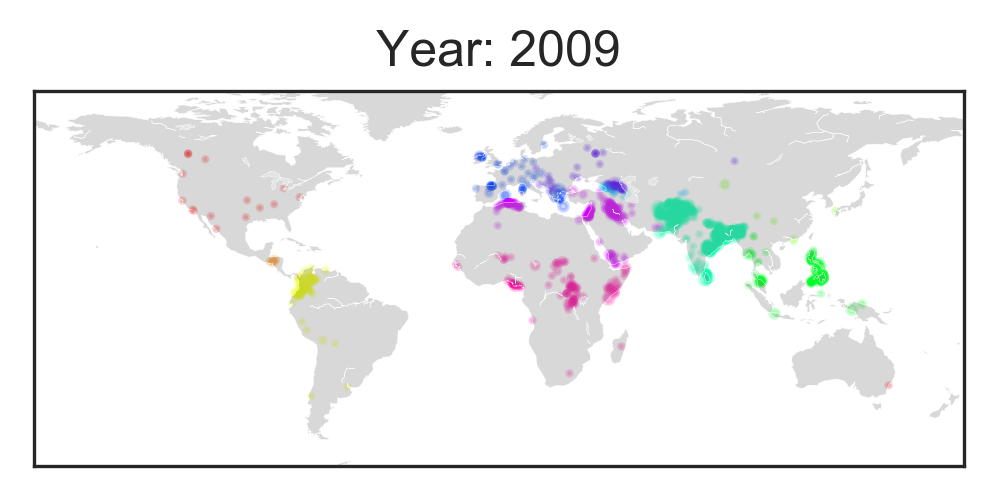

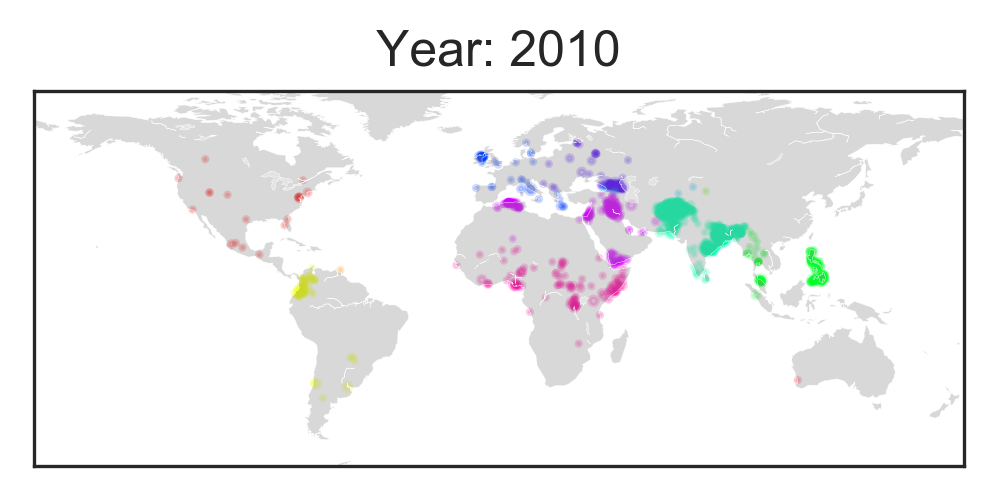

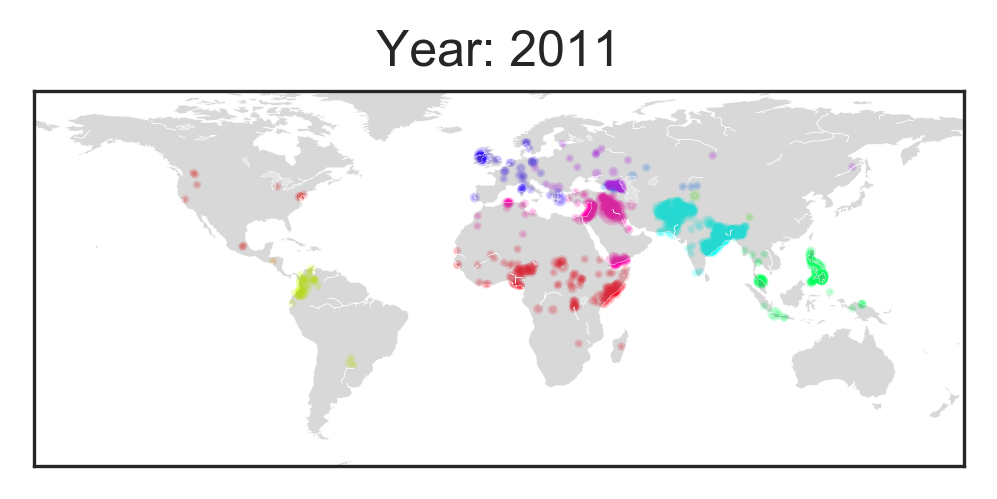

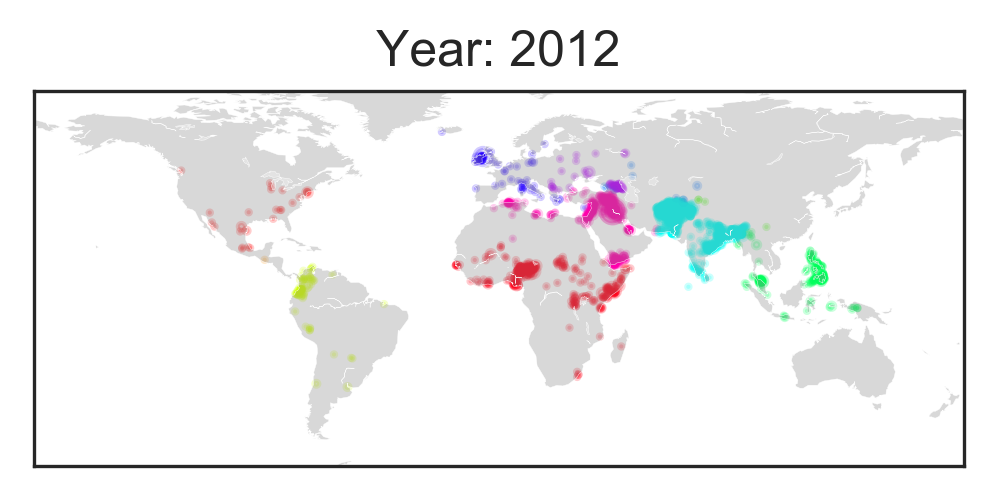

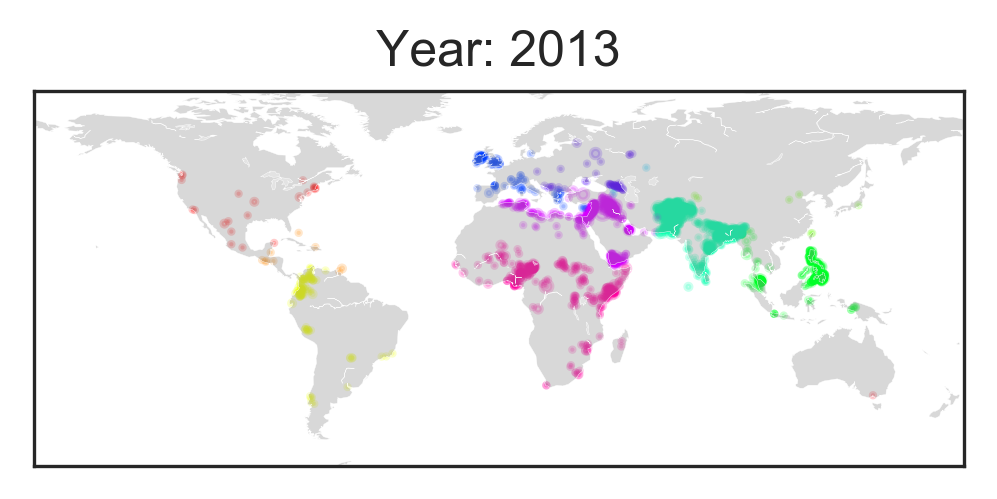

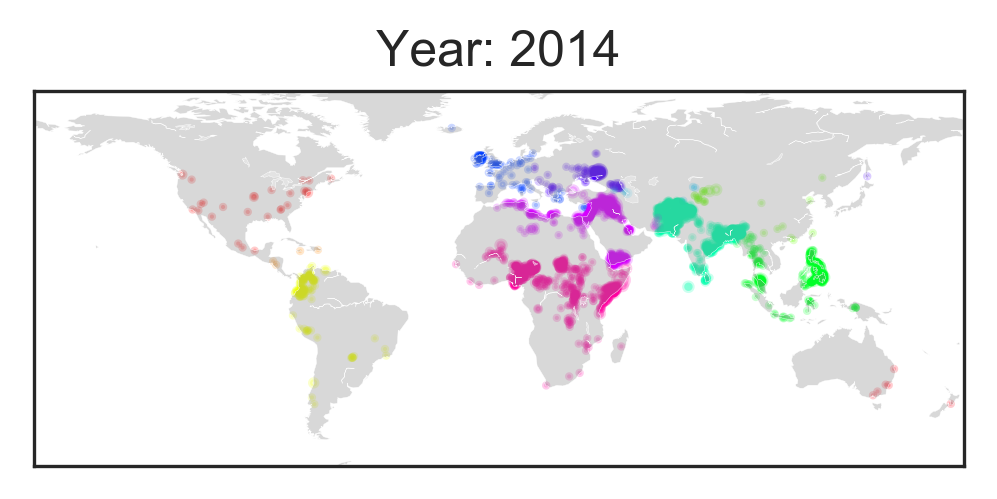

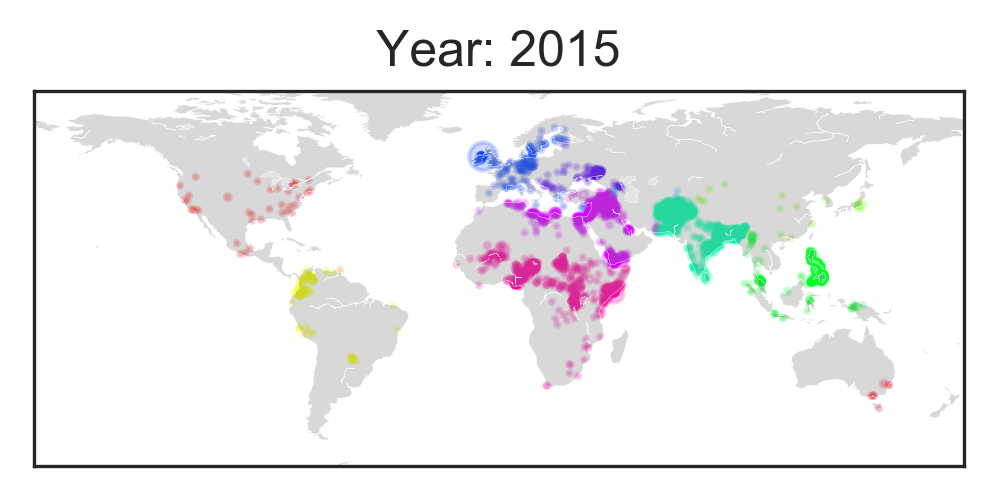

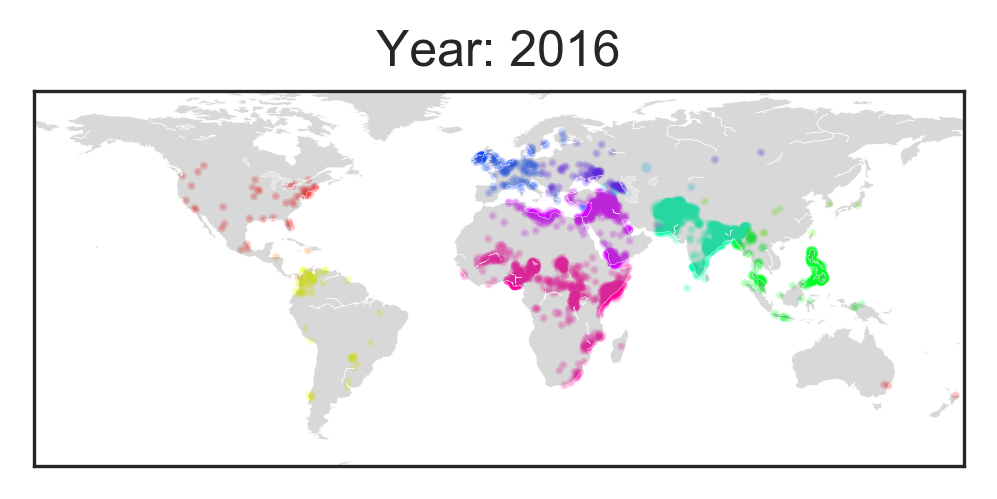

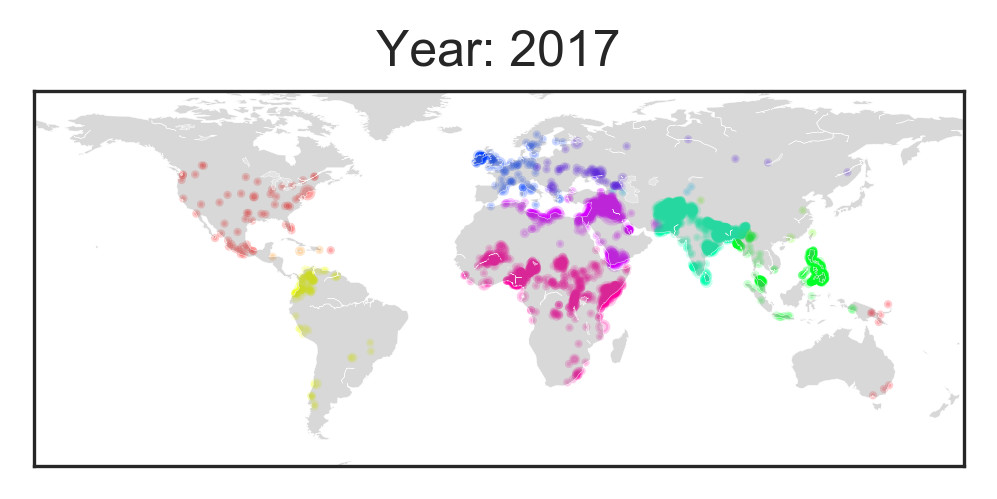

In [20]:
#Read in the Data
data = pd.read_csv('global_terrorism_db.csv')

# For each year:
for i in data.iyear.unique():
    # Set the dimension of the figure
    my_dpi=300
    plt.figure(figsize=(1200/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Get the data
    tmp=data[data['iyear'] == i]

    dmean = tmp.groupby(["city"], as_index=False)[["latitude","longitude"]].mean()
    dmed = tmp.groupby(["city"], as_index=False)[["latitude","longitude"]].median()
    dmode = tmp.groupby(["city"], as_index=False)[["latitude","longitude"]].agg(lambda x: scipy.stats.mode(x)[0])
    
    # Cross Validate using the Mean, Median, and Mode
    good_local = dmean.merge(dmed).merge(dmode)
    
    # Get Number of Incidents per City
    d2 = pd.DataFrame(tmp.groupby(['city','region'])['city'].count())
    d2.columns = ['count']
    d2.reset_index(inplace=True)

    merged=good_local.merge(d2, on = 'city')

    # Make the background map
    m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
    m.fillcontinents(color='grey', alpha=0.3)
    m.drawcoastlines(linewidth=0.1, color="white")

    # Add a point per position
    m.scatter(merged['longitude'],
              merged['latitude'], 
              s=merged['count'], 
              alpha=0.2,
              c=merged['region'],
              cmap="hsv")

    #Add Plot Titles
    plt.title("Year: "+str(i))

#     #Save Image
#     filename='GTD_BubbleAnimation_step'+str(i)+'.png'
#     plt.savefig(filename, dpi=300)
#     plt.gca()

# Total for All Time (1970-2017)

Text(0.5,1,'Total Terrorism Incidents 1970-2017')

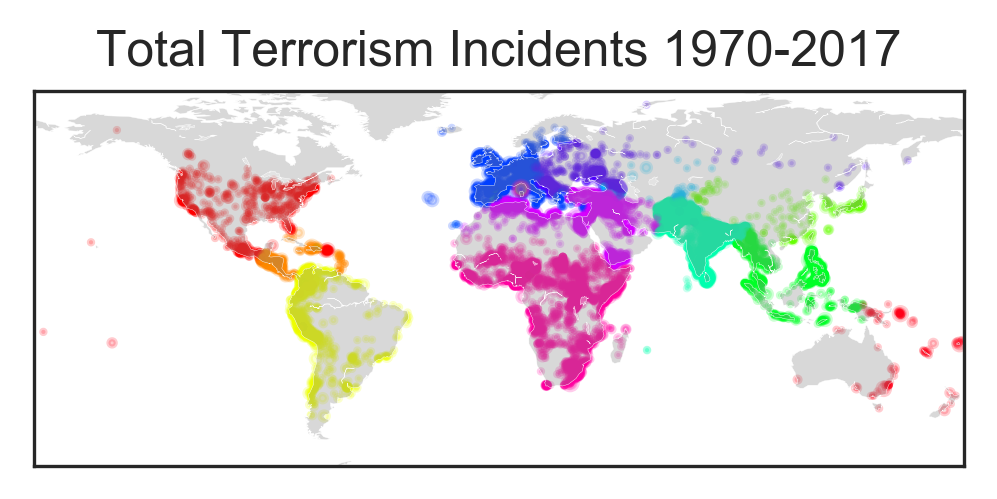

In [26]:
#Read in the Data
data = pd.read_csv('global_terrorism_db.csv')

# Find the location of each city
dmean = data.groupby(["city"], as_index=False)[["latitude","longitude"]].mean()
dmed = data.groupby(["city"], as_index=False)[["latitude","longitude"]].median()
dmode = data.groupby(["city"], as_index=False)[["latitude","longitude"]].agg(lambda x: scipy.stats.mode(x)[0])

# Cross Validate for city location using the Mean, Median, and Mode
good_local = dmean.merge(dmed).merge(dmode)

# Get Number of Incidents per City
d2 = pd.DataFrame(data.groupby(['city','region'])['city'].count())
d2.columns = ['count']
d2.reset_index(inplace=True)

merged=good_local.merge(d2, on = 'city')

# Set the dimension of the figure
my_dpi=300
plt.figure(figsize=(1200/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# Add a point per position
m.scatter(merged['longitude'],
          merged['latitude'], 
          s=merged['count'], 
          alpha=0.2,
          c=merged['region'],
          cmap="hsv")

#Add Plot Titles
plt.title('Total Terrorism Incidents 1970-2017')

#     #Save Image
#     filename='GTD_BubbleAnimation_step'+str(i)+'.png'
#     plt.savefig(filename, dpi=300)
#     plt.gca()